<a href="https://colab.research.google.com/github/Parkseojin2001/Machine-Learning_with_python/blob/main/Chapter7_Working-with-text-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter7 텍스트 데이터 다루기

텍스트 데이터는 주로 글자가 연결된 문자열로 표현된다.

텍스트 데이터의 길이는 서로 같은 경우가 거의 없음 &rarr; 머신러닝 적용하기 전 전처리가 필요

## 7.1 문자열 데이터 타입

**문자열 데이터 종류**

- 범주형 데이터

- 범주에 의미를 연결시킬 수 있는 임의의 문자열

- 구조화된 문자열 데이터

- 텍스트 데이터

**범주형 데이터** : 고정된 목록으로 구성 = 드롭다운 메뉴

ex ) 사람들이 가장 좋아하는 색 : 8가지의 색 중 선택해야하는 경우

- 데이터셋에서 고유의 값을 찾아 히스토그램을 그려볼 수 있음

- 각 값이 애플리케이션에서 생각하는 범주에 적절한지 확인

**범주에 의미를 연결시킬 수 있는 임의의 문자열** : 직접 입력한 값 = 텍스트 필드로 제공되어 생성된 데이터

ex ) 사람들이 가장 좋아하는 색 : 철자를 틀림, 구체적으로 색을 작성, 자기만의 이름을 붙인 색을 입력

- 범주형 변수를 변환하려면 가장 보편적인 값을 선택 or 음답을 포용할 수 있는 범주를 정의

- 수작업을 많이 해야 하고 자동화하기 어려움

**구조화된 문자열 데이터**

ex ) 주소나 장소, 사람 이름, 날짜, 전화번호, 식별번호

- 분석하기 어려움

- 처리 방법이 문맥이나 분야에 따라 매우 다름

**텍스트 데이터** : 자유로운 형태의 절과 문장

ex ) 트윗, 채팅, 호텔 리뷰, 셰익스피어 작품

- 대부분 단어로 구성된 문장에 정보를 담고 있음

- 말뭉치(corpus) : 데이터셋

- 문서(document) : 각 데이터 포인트

## 7.2 예제 애플리케이션 : 영화 리뷰 감성 분석

사용할 데이터 : 영화 리뷰 데이터셋

- 리뷰 텍스트 + '양성' or '음성'을 나타내는 레이블

- 7점 이상은 '양성'이고 4점 이하는 '음성'으로 분류



In [1]:
! wget -nc http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -P data
! tar xzf data/aclImdb_v1.tar.gz --skip-old-files -C data

--2023-02-07 13:01:13--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘data/aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  22.1MB/s    in 5.8s    

2023-02-07 13:01:19 (13.9 MB/s) - ‘data/aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [2]:
!find ./data -type d

./data
./data/aclImdb
./data/aclImdb/train
./data/aclImdb/train/unsup
./data/aclImdb/train/neg
./data/aclImdb/train/pos
./data/aclImdb/test
./data/aclImdb/test/neg
./data/aclImdb/test/pos


In [3]:
!rm -r data/aclImdb/train/unsup

In [ ]:
!pip install mglearn

In [ ]:
!pip install --upgrade joblib==1.1.0

In [6]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import warnings
warnings.filterwarnings("ignore")

In [7]:
# load_files : 훈련 데이터 읽기
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")
# 텍스트와 레이블을 포함하고 있는 Bunch 오브젝트를 반환
text_train, y_train = reviews_train.data, reviews_train.target
print("text_train의 타입:", type(text_train))
print("text_train의 길이:", len(text_train))
print("text_train[6]:\n", text_train[6])

text_train의 타입: <class 'list'>
text_train의 길이: 25000
text_train[6]:
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [8]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [9]:
print("클래스별 샘플 수 (훈련 데이터):", np.bincount(y_train))

클래스별 샘플 수 (훈련 데이터): [12500 12500]


In [10]:
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("테스트 데이터의 문서 수:", len(text_test))
print("클래스별 샘플 수 (테스트 데이터):", np.bincount(y_test))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

테스트 데이터의 문서 수: 25000
클래스별 샘플 수 (테스트 데이터): [12500 12500]


## 7.3 텍스트 데이터를 BOW로 표현하기

BOW(bag or words) : 텍스트를 표현하는 방법 중 가장 간단하고 효과적이면서 널리 쓰이는 방법

- 장, 문단, 문장, 서식 같은 입력 텍스트의 구조 대부분을 잃음

- 각 단어가 이 말뭉치에 있는 텍스트에 알마나 많이 나타나는지 계산

- 단어의 출현 횟수만 계산, 구조 상관 X

**전체 말뭉치에 대한 계산 단계**

1. **토큰화(tokenization)** : 각 문서를 문서에 포함된 단어(토큰)로 나눕니다. 예를 들어 공백이나 구두점 등을 기준으로 분리

2. **어휘 사전 구축** : 모든 문서에 나타난 모든 단어의 어휘를 모으고 번호를 매김(알파벳 순서).

3. **인코딩** : 어휘 사전의 단어가 문서마다 몇 번이나 나타나는지를 헤아림.

**샘플 데이터에 BOW 적용하기**

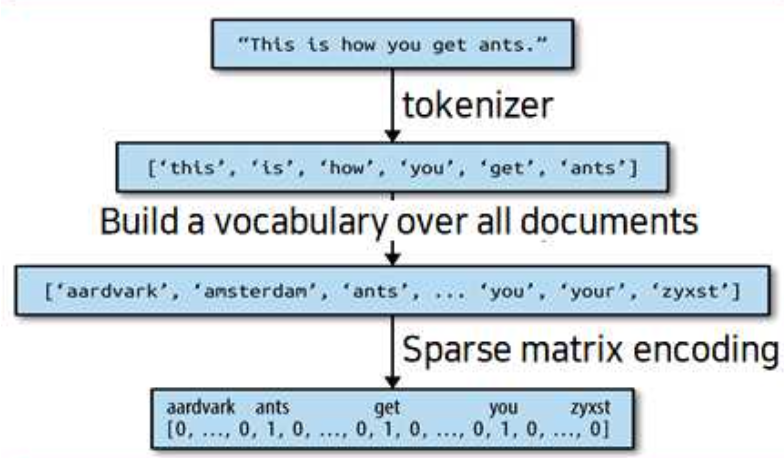

- 출력은 각 문서에서 나타난 단어의 횟숫가 담긴 하나의 벡터

- 수치 표현은 전체 데이터셋에서 고유한 각 단어를 특성으로 가짐

- 원본 문자열에 있는 단어의 순서는 BOW 특성 표현에서는 완전히 무시됨

### 7.3.1 샘플 데이터에 BOW 적용하기



In [11]:
bards_words = ["The fool doth think he is wise,", "but the wise man knows himself to be a fool"]

In [12]:
# fit 메서드 : 훈련 데이터를 토큰으로 나누고 어휘 사전을 구축하여 vocabulary_속성에 저장
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [13]:
print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:\n", vect.vocabulary_)

어휘 사전의 크기: 13
어휘 사전의 내용:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [14]:
# BOW 표현 만들기
bag_of_words = vect.transform(bards_words)
print("BOW:", repr(bag_of_words))

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


**결과 분석**

- 행렬의 크기는 2 x 13 인데, 각각의 행은 하나의 데이터 포인트를 나타냄

- 각 특성은 어휘 사전에 있는 각 단어에 대응

In [15]:
print("BOW의 밀집 표현:\n", bag_of_words.toarray())

BOW의 밀집 표현:
 [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


**출력 결과 분석**

- 각 단어의 출현 횟수는 0아니면 1 &rarr; bards_words에 있는 두 문자열 모두 같은 단어를 두 개 이상 가지고 있지 않음

- 첫 번째 행 = "The fool doth think he is wise," 를 나타냄

- 두 번째 행 = "but the wise man knows himself to be a fool" 을 나타냄

- 어휘 사전의 순서대로 나오는 단어의 개수가 나열되어있는 배열임 (ex. 첫 번째 단어(be) - 첫 번째 문장에서는 0번, 두 번째 문장에서는 1번 나옴)

### 7.3.2 영화 리뷰에 대한 BOW


In [16]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n", repr(X_train))

X_train:
 <25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


- 훈련 데이터의 BOW 표현인 X_train의 크기는 25,000 x 74,849로, 이 어휘 사전은 단어를 74,849개 담고 있음

- SciPy 희소 행렬로 저장

In [17]:
# get_feature_names_out 메서드는 각 특성에 해당하는 단어를 리스트로 반환
feature_names = vect.get_feature_names_out()
print("특성 개수:", len(feature_names))
print("처음 20개 특성:\n", feature_names[:20])
print("20010에서 20030까지 특성:\n", feature_names[20010:20030])
print("매 2000번째 특성:\n", feature_names[::2000])

특성 개수: 74849
처음 20개 특성:
 ['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02']
20010에서 20030까지 특성:
 ['dratted' 'draub' 'draught' 'draughts' 'draughtswoman' 'draw' 'drawback'
 'drawbacks' 'drawer' 'drawers' 'drawing' 'drawings' 'drawl' 'drawled'
 'drawling' 'drawn' 'draws' 'draza' 'dre' 'drea']
매 2000번째 특성:
 ['00' 'aesir' 'aquarian' 'barking' 'blustering' 'bête' 'chicanery'
 'condensing' 'cunning' 'detox' 'draper' 'enshrined' 'favorit' 'freezer'
 'goldman' 'hasan' 'huitieme' 'intelligible' 'kantrowitz' 'lawful' 'maars'
 'megalunged' 'mostey' 'norrland' 'padilla' 'pincher' 'promisingly'
 'receptionist' 'rivals' 'schnaas' 'shunning' 'sparse' 'subset'
 'temptations' 'treatises' 'unproven' 'walkman' 'xylophonist']


**출력 결과 분석**

- 어휘 사전의 처음 20개 중 15개의 항목이 숫자임 &rarr; 대부분은 그 자체로 의미가 있지 않으므로 선별하기가 쉽지 않음

- "dra"로 시작하는 "draught", "drawback", "drawer" 모두 단수와 복수형이 서로 다른 단어로 어휘 사전에 포함<br>
  &rarr; 의미가 매우 비슷하므로 다른 특성으로 간주하여 개별적으로 기록하는 것은 바람직하지 않음

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter = 1000), X_train, y_train, n_jobs = -1)
print("Cross-validation mean score: {:.2f}".format(np.mean(scores)))

Cross-validation mean score: 0.88


In [19]:
# LogisticRegression 규제 매개변수 C가 존재
# 그리드 서치를 사용해 조정
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter = 5000), param_grid, n_jobs = -1)
grid.fit(X_train, y_train)
print("Best cross_validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross_validation score: 0.89
Best parameters:  {'C': 0.1}


In [20]:
# 테스트 세트의 일반화 성능
X_test = vect.transform(text_test)
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.88


**단어 추출 방법**

- CountVectorizer는 정규표현식을 사용해 토큰을 추출한다.

- 모든 단어를 소문자로 바꾸므로 모두 같은 토큰(즉 특성)이 됨 &rarr; 의미 없는 특성(숫자 같은)을 많이 생성

*의미없는 특성(숫자 같은)을 줄이는 방법*

- 두 개의 문서(또는 다섯 개의 문서 등)에 나타난 토큰만을 사용

**정규방정식** : "b\w\w + \b"

- 경계(\b)가 구분되고 적어도 둘 이상의 문자나 숫자(\w)가 연속된 단어를 찾는 방법

- "doesn't" 같은 축약형이나 "bit.ly" 같은 단어는 분리되고, "h8ter"는 한 단어로 매칭됨


In [21]:
# min_df 매개변수 : 토큰이 나타날 최소 문서 개수를 지정
# 토큰(단어)가 적어도 다섯 번 이상 나타내는 특성만 추출 -> 특성의 수가 줄음
vect = CountVectorizer(min_df = 5).fit(text_train)
X_train = vect.transform(text_train)
print("min_df로 제한한 X_train:", repr(X_train))

min_df로 제한한 X_train: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [22]:
# 숫자 길이가 줄음
# 희귀한 단어와 철자가 틀린 단어들이 사라짐
feature_names = vect.get_feature_names_out()

print("처음 50개 특성:\n", feature_names[:50])
print("20,010부터 20,030까지 특성:\n", feature_names[20010:20030])
print("매 700번째 특성:\n", feature_names[::700])

처음 50개 특성:
 ['00' '000' '007' '00s' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10'
 '100' '1000' '100th' '101' '102' '103' '104' '105' '107' '108' '10s'
 '10th' '11' '110' '112' '116' '117' '11th' '12' '120' '12th' '13' '135'
 '13th' '14' '140' '14th' '15' '150' '15th' '16' '160' '1600' '16mm' '16s'
 '16th']
20,010부터 20,030까지 특성:
 ['repentance' 'repercussions' 'repertoire' 'repetition' 'repetitions'
 'repetitious' 'repetitive' 'rephrase' 'replace' 'replaced' 'replacement'
 'replaces' 'replacing' 'replay' 'replayable' 'replayed' 'replaying'
 'replays' 'replete' 'replica']
매 700번째 특성:
 ['00' 'affections' 'appropriately' 'barbra' 'blurbs' 'butchered' 'cheese'
 'commitment' 'courts' 'deconstructed' 'disgraceful' 'dvds' 'eschews'
 'fell' 'freezer' 'goriest' 'hauser' 'hungary' 'insinuate' 'juggle'
 'leering' 'maelstrom' 'messiah' 'music' 'occasional' 'parking'
 'pleasantville' 'pronunciation' 'recipient' 'reviews' 'sas' 'shea'
 'sneers' 'steiger' 'swastika' 'thrusting' 'tvs' 'vampyre' 'we

In [23]:
grid = GridSearchCV(LogisticRegression(max_iter = 5000), param_grid, n_jobs = -1)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))

최상의 교차 검증 점수: 0.89


- 특성의 개수가 줄어서 처리 속도가 빨라지고, 불필요한 특성이 없어져 모델을 이해하기 쉬워짐

## 7.4 불용어

의미 없는 단어를 제거하는 또 다른 방법은 너무 빈번하여 유용하지 않은 단어를 제외하는 것이 있다.

- 언어별 불용어(stopword) 목록을 사용하는 것

- 언어별 불용어 목록을 너무 자주 나타나는 단어를 제외하는 것

*scikit-learn은 feature_extraction.text 모듈에 영어의 불용어를 가지고 있음*

In [24]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("불용어 개수: ", len(ENGLISH_STOP_WORDS))
print("매 10번째 불용어:\n", list(ENGLISH_STOP_WORDS)[::10])

불용어 개수:  318
매 10번째 불용어:
 ['wherein', 'all', 'beside', 'so', 'amongst', 'back', 'show', 'among', 'under', 'mostly', 'forty', 'most', 'much', 'i', 'four', 'have', 'former', 'hers', 'thereupon', 'hasnt', 'before', 'go', 'detail', 'no', 'until', 'during', 'became', 'become', 'whole', 'anything', 'on', 'both']


불용어를 제외하면 특성의 개수가 이 목록의 길이(318개) 만큼만 줄어들겠지만, 성능이 향상될 수 있음

In [25]:
# stop_words = "english"라고 지정하면 내장된 불용어를 사용
# 내장된 불용어에 추가할 수도 있고 자신만의 목록을 사용
vect = CountVectorizer(min_df = 5, stop_words = "english").fit(text_train)
X_train = vect.transform(text_train)
print("불용어가 제거된 X_train:\n", repr(X_train))

불용어가 제거된 X_train:
 <25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


원래 특성 개수 : 27,271개

불용어가 제거된 특성 개수 : 26,966개 (27,271 - 305)

In [26]:
grid = GridSearchCV(LogisticRegression(max_iter = 5000), param_grid, n_jobs = -1)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.88


**출력된 결과 분석**

- 불용어를 사용한 그리드 서치의 성능은 조금 감소함

- 특성 305개를 제외했다고 성능이나 모델 해석이 나아지지 않음 &rarr; 도움이 안되었음

*고정된 불용어 목록은 모델이 데이터셋만 보고 불용어를 골라내기 어려운 작은 데이터셋에서나 도움이 됨*

## 7.5 tf-idf로 데이터 스케일 변경하기

얼마나 의미 있는 특성인지를 계산해서 스케일을 조정하는 방식이 있다.

**tf-idf(term frequency-inverse document frequency)** : 말뭉치의 다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법

- 한 단어가 특정 문서에 자주 나타나고 다른 여러 문서에서는 그렇지 않다면, 그 문서의 내용을 아주 잘 설명하는 단어라고 할 수 있음

- scikit-learn은 두 개의 파이썬 클래스(TfidfTransformer, TfidfVectorizer)에 tf-idf를 구현

- tf-idf는 실제로 훈련 데이터의 통계적 속성을 사용

*TfidfTransformer*

- CountVectorizer가 만든 희소 행렬을 입력받아 변환

*TfidfVectorizer*

- 텍스트 데이터를 입력받아 BOW 특성 추출과 tf-idf 변환을 수행

**문서 d에 있는 단어 w에 대한 tf-idf 점수 정의**

<img src = "https://latex.codecogs.com/svg.image?tfidf(w,%20d)%20=%20tf(log(\frac{N+1}{N_{w}+1})%20+%201)">

- N : 훈련 세트에 있는 문서의 개수

- N_w : 단어 w가 나타난 훈련 세트 문서의 개수

- tf(단어 빈도수) : 단어 w가 대상 문서 d(변환 또는 인코딩하려는 문서)에 나타난 횟수

두 파이썬 클래스 모두 tf-idf 계산을 한 후에 L2 정규화(L2 normalization)를 적용<br>

&rarr; 유클리디안 노름(euclidean norm)이 1이 되도록 각 문서 벡터의 스케일을 바꿈(문서의 길이 = 단어의 수에 영향을 받지 않음)


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df = 5), LogisticRegression(max_iter = 5000))
param_grid = {'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, n_jobs = -1)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.89


**출력 결과 분석**

- tf-idf가 성능에 큰 영향을 주지 못함

- tf-idf 변환은 문서를 구별하는 단어를 찾는 방법이지만 완전히 비지도 학습 = '긍정적인 리뷰'와 '부정적인 리뷰' 레이블과 꼭 관계있지 않음

In [28]:
# TfidfVectorizer 단계를 선택
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# 훈련 데이터셋을 변환
X_train = vectorizer.transform(text_train)
# 특성별로 가장 큰 값을 찾음
max_value = X_train.max(axis = 0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# 특성 이름 구하기
feature_names = np.array(vectorizer.get_feature_names_out())
print("가장 낮은 tfidf를 가진 특성:\n", feature_names[sorted_by_tfidf[:20]])
print("가장 높은 tfidf를 가진 특성: \n", feature_names[sorted_by_tfidf[-20:]])

가장 낮은 tfidf를 가진 특성:
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
가장 높은 tfidf를 가진 특성: 
 ['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


**tf-idf가 낮은 특성**

- 전체 문서에 걸쳐 매우 많이 나타남

- 조금씩만 사용

- 매우 긴 문서에만 사용

**tf-idf가 높은 특성**

- 특정한 쇼나 드라마에 대한 리뷰에서만 나타남

  - "pokemon", "smallville", "doodlebops" : 디지니의 어린이용 뮤지컬 코미디 프로그램

  - "scanners" : 공포 영화

- 감성 분석(긍정/ 부정)에 도움이 되지는 않지만 리뷰에 대한 구체적은 정보를 많이 포함

In [29]:
# idf 값이 낮은 단어 = 자주 나타나서 덜 중요하다고 생각되는 단어 확인
# 훈련 세트의 idf 값은 idf_ 속성에 저장
sorted_by_idf = np.argsort(vectorizer.idf_)
print("가장 낮은 idf를 가진 특성:\n", feature_names[sorted_by_idf[:100]])

가장 낮은 idf를 가진 특성:
 ['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


**idf 값이 낮은 단어 분석**

- "the", "no" 같은 영어 불용어

- "movie", "film", "time", "story" 같이 영화 리뷰에서만 나타나는 단어

- "good", "great", "bad"도 매우 자주 나타나는 단어라서 감성 분석에 중요함<br>
  
  *but, tf-idf로 봤을 때는 덜 중요한 단어*

## 7.6 모델 계수 조사

로지스틱 회귀 모델이 실제로 이 데이터에서 무엇을 학습했는지 자세히 볼 수 있음

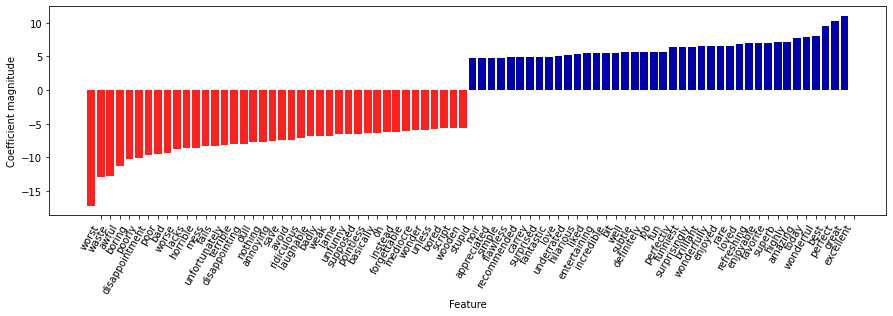

In [30]:
# 가장 큰 계수 40개와 가장 작은 계수 40개를 출력
# tf-idf 특성으로 훈련시킨 로지스틱 회귀의 최댓값, 최솟값 계수
# 막대의 크기 : 계수의 크기
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_[0],
    feature_names, n_top_features = 40
)

**그래프 분석**

- 왼쪽의 음수 계수 : 부정적인 리뷰를 의미하는 단어가 속함

- 오른쪽의 음수 계수 : 긍정적인 리뷰를 의미하는 단어가 속함

- "bit", "job", "today" 같은 단어는 덜 명확하지만 아마도 "good job"이나 "best today" 같은 구절의 일부로 볼 수 있음


## 7.7 여러 단어로 만든 BOW (n - 그램)

BOW 표현 방식은 단어의 순서가 완전히 무시된다는 단점이 있다.<br>
ex. "it's bad, not good at all" = "it's good, not bad at all"

**해결 방안**

- 토큰 하나의 횟수만 고려하지 않고 옆에 있는 두 세 개의 토큰을 함께 고려하는 방식으로 단점을 보안한다.

**n - 그램(n-gram)** : 연속된 n개의 토크를 함께 고려하는 방식

```
  바이그램(bigram) : 토큰 두 개

  트라이그램(trigram) : 토큰 세 개
```

- CountVectorizer & TfidfVectorizer : ngram_range 매개변수에 특성으로 고려할 토큰의 범위를 지정할 수 있음

- n_gram_range : 입력값은 튜플이며 고려할 토큰의 범위를 지정할 수 있음

In [31]:
print("bards_words:\n", bards_words)

bards_words:
 ['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [32]:
# 기본값은 최소 길이 1이며 최대 길이가 1인 토큰(1 ~ 1)마다 하나의 특성을 형성 = 유니그램(토큰 하나)
cv = CountVectorizer(ngram_range = (1, 1)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:\n", cv.get_feature_names_out())

어휘 사전 크기: 13
어휘 사전:
 ['be' 'but' 'doth' 'fool' 'he' 'himself' 'is' 'knows' 'man' 'the' 'think'
 'to' 'wise']


In [33]:
# 토큰 두 개가 연속된 바이그램
cv = CountVectorizer(ngram_range = (2, 2)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:\n", cv.get_feature_names_out())

어휘 사전 크기: 14
어휘 사전:
 ['be fool' 'but the' 'doth think' 'fool doth' 'he is' 'himself to'
 'is wise' 'knows himself' 'man knows' 'the fool' 'the wise' 'think he'
 'to be' 'wise man']


In [34]:
print("변환된 데이터 (밀집 배열):\n",cv.transform(bards_words).toarray())

변환된 데이터 (밀집 배열):
 [[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


- 연속된 토큰의 수가 커지면 보통 특성이 더 구체적이고 많이 만들어짐

- 토큰의 수가 커지면 특성의 개수와 구체적인 특성이 매우 많아지므로 과대적합될 가능성이 있음

- 이론상 바이그램(n = 2)수는 유니그램(n = 1)수의 제곱이 되고, 트라이그램(n = 3)수는 유니그램의 세제곱이 됨

In [35]:
# bards_words에 유니그램, 바이그램, 트라이그램을 적용
cv = CountVectorizer(ngram_range = (1, 3)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:", cv.get_feature_names_out())

어휘 사전 크기: 39
어휘 사전: ['be' 'be fool' 'but' 'but the' 'but the wise' 'doth' 'doth think'
 'doth think he' 'fool' 'fool doth' 'fool doth think' 'he' 'he is'
 'he is wise' 'himself' 'himself to' 'himself to be' 'is' 'is wise'
 'knows' 'knows himself' 'knows himself to' 'man' 'man knows'
 'man knows himself' 'the' 'the fool' 'the fool doth' 'the wise'
 'the wise man' 'think' 'think he' 'think he is' 'to' 'to be' 'to be fool'
 'wise' 'wise man' 'wise man knows']


In [37]:
# min_df : 토큰이 나타날 최소 문서 개수를 지정
pipe = make_pipeline(TfidfVectorizer(min_df = 5), LogisticRegression(max_iter = 5000))

param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'tfidfvectorizer__ngram_range' : [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, n_jobs = -1)
grid.fit(text_train, y_train)
print("최상의 교차 검증 점수 : {:.2f}".format(grid.best_score_))
print("최적의 매개변수:\n", grid.best_params_)

최상의 교차 검증 점수 : 0.91
최적의 매개변수:
 {'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


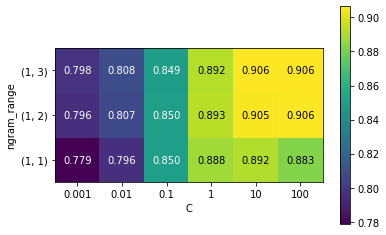

In [40]:
# 매개변수 ngram_range와 C에 대한 평균 교차 검증 정확도의 히트맵
#그리드 서치에서 테스트 점수 추출
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# 히트랩 그리기
heatmap = mglearn.tools.heatmap(
    scores, xlabel = 'C', ylabel = 'ngram_range', cmap = 'viridis', fmt = '%.3f',
    xticklabels = param_grid['logisticregression__C'],
    yticklabels = param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)
plt.show()

**히트맵 분석**

- 바이그램(n = 2)이 성능을 크게 높여주며 트리아그램은 정확도 축면에서 성능이 조금나 향상됨.

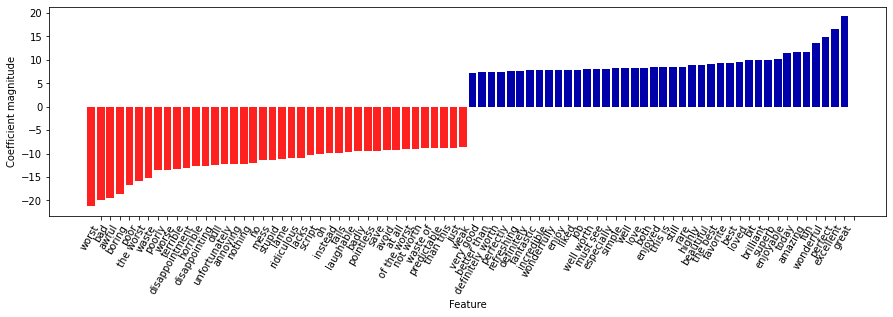

In [42]:
# tf-idf와 유니그램, 바이그램, 트라이그램을 사용한 모델에서 가장 중요한 특성
# 특성 이름과 계수를 추출
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names_out())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features = 40)

**그래프 분석**

- "not worth"는 부정적인 리뷰를 의미하지만 "definitely worth" 와 "well worth"는 긍정적인 리뷰를 암시하는 새로운 특성이 나타남<br>
 &rarr; "worth" 단어의 의미에 영향을 주는 예시임

- 바이그램 (and 트라이그램) 에서 독립적일 땐 큰 의미가 없는 단어들이 뭉쳐 의미가 있는 단어들로 구성되어있었음

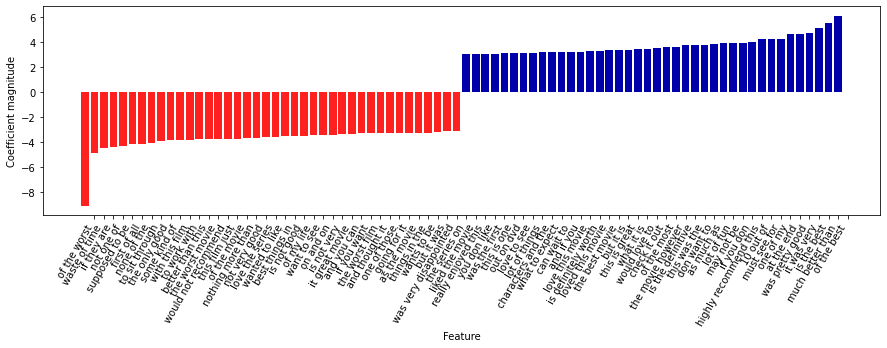

In [43]:
# 모델의 트라이그램 중요도를 나타낸 그래프
# 트라이그램 특성을 찾음
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# 트라이그램 특성만 그래프로 나타남
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features = 40)

## 7.8 고급 토큰화, 어간 추출, 표제어 추출

- 어휘 사전에 단수와 복수 단어가 함께 포함되어 있는 경우

  ex. drawback and drawbacks / draw and drawers / drawing and drawings

- 여러 동사형과 관련 단어들

  ex. replace, replaced, replacement, replaces, replacing
  
*의미는 매우 가까운 단어들을 구분하게 되면 과대적합되기 쉽고 훈련 데이터를 완전하게 활용 X*

**해결 방법**

각 단어를 그 단어의 어간으로 표현해서 같은 어간을 가진 모든 단어를 구분해야 (또는 합쳐야) 한다.

- **어간 추출(stemming)** :  어미를 찾아 제외하는 규칙 기반 방식

- **표제어 추출(lemmatization)** : 단어의 형태 사전을 사용하고 문장에서 단어의 역할을 고려하는 처리 방식

&rarr; 어간 추출 + 표제어 추출 (+ 맞춤법 교정) = **정규화**하는 과정



In [ ]:
pip install nltk spacy

In [47]:
import spacy

try:
    en_nlp = spacy.load('en_core_web_sm')
except:
    !pip install spacy
    !python -m spacy download en

In [48]:
import spacy
import nltk

# spacy의 영어 모델을 로드
en_nlp = spacy.load('en_core_web_sm')
# nltk의 PorterStemmer 객체를 생성
stemmer = nltk.stem.PorterStemmer()

# spacy의 표제어 추출과 nltk의 어간 추출을 비교하는 함수
def compare_normalization(doc):
  # spacy로 문서를 토큰화
  doc_spacy = en_nlp(doc)
  # spacy로 찾은 표제어를 출력
  print("표제어:")
  print([token.lemma_ for token in doc_spacy])
  # PorterStemmer로 찾은 토큰을 출력
  print("어간:")
  print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [49]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                      "I'm scared of meeting the clients tomorrow.")

표제어:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'I', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
어간:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


**추출 결과**

- 어간 추출은 항상 단어의 어간만 남기므로 "was"는 "wa"가 되지만, 표제어 추출은 올바른 동사형인 "be"를 추출

- 표제어 추출은 "worse"를 "bad"로 정규화시키는 반면 어간 추출은 "wors"가 됨

- 어간 추출은 두 번의 "meeting"을 "meet"로 바꿨지만 표제어 추출은 첫 번쨰 "meeting"은 명사로 인식해 그대로 두고 두 번째 나타냈을 땐 동사로 인식해 "meet"로 변환

*표제어 추출은 어간 추출보다 훨씬 복잡한 처리를 거침 &rarr; 어간 추출보다 더 좋은 결과를 냄*

In [50]:
# 요구 사항: spacy에서 표제어 추출 기능과 CountVectorizer의 토큰 분할기를 사용

# spacy의 언어 모델을 로드
en_nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner'])

# spacy 문서 처리 파이프라인을 사용해 자작 토큰 분할기 생성
def custom_tokenizer(document):
  doc_spacy = en_nlp(document)
  return [token.lemma_ for token in doc_spacy]

# 자작 토큰 분할기를 사용해 CountVectorizer 객체를 생성
lemma_vect = CountVectorizer(tokenizer = custom_tokenizer, min_df = 5)

In [51]:
# 표제어 추출이 가능 한 CountVectorizer 객체로 text_train을 변환
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape:", X_train_lemma.shape)

# 비교를 위해 표준 CountVectorizer를 사용
vect = CountVectorizer(min_df = 5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape", X_train.shape)

X_train_lemma.shape: (25000, 21925)
X_train.shape (25000, 27271)


**출력 결과 분석**

- 27,271개에서 20660개로 줄음 &rarr; 표제어 추출은 일부 특성들을 합치기 때문임

In [54]:
# 훈련 세트의 1%만 사용해서 그리드 서치를 생성
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 10]}
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.99,
                            train_size = 0.01, random_state = 0)
grid = GridSearchCV(LogisticRegression(max_iter = 5000), param_grid, cv = cv, n_jobs = - 1)

# 기본 CountVectorizer로 그리드 서치를 수행
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수 "
      "(기본 CountVectorizer): {:.3f}".format(grid.best_score_))

# 표제어를 사용해서 그리드 서치를 수행
grid.fit(X_train_lemma, y_train)
print("최상의 교차 검증 점수"
      "(표제어): {:.3f}".format(grid.best_score_))

최상의 교차 검증 점수 (기본 CountVectorizer): 0.719
최상의 교차 검증 점수(표제어): 0.717


## 7.9 토픽 모델링과 문서 군집화

**토픽 모델링(topic modeling)** : 텍스트 데이터에 자주 적용하는 기법으로 비지도 학습으로 문서를 하나 또는 그 이상의 토픽으로 할당하는 작업을 통칭함
```
  1. 한 문서가 하나의 토픽에 할당하면 같은 문서를 군집시킴

  2. 문서가 둘 이상의 토픽을 가질 수 있다면 분해 방법임
```

- 학습된 각 성분은 하나의 토픽에 해당하며 문서를 표현한 성분의 계수는 문서가 어떤 토픽에 얼마만큼 연관되어 있음

- **잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)** : 토픽 모델링의 한 부분이며 특정한 성분 분해 방법을 말함.

### 7.9.1 LDA

- LDA 모델은 함께 자주 나타나는 단어의 그룹(토픽)을 찾는 것이다.

- 결과 왜곡 방지 : 자주 나타나는 단어 제거

- LDA는 각 문서에 토픽 (일반적인 '주제'가 아님) 의 일부가 혼합되어 있다고 간주함

```
  토픽의 예시
  
  - 정치 기사('주지사', '선거', '정당' 등의 단어가 자주 사용)
  
  - 스포츠 기사('팀', '점수', '시즌' 등의 단어가 자주 사용)
  
  - A 기자가 즐겨 쓰는 단어 \ B 기자가 즐겨 쓰는 단어

```


In [60]:
# LDA를 영화 리뷰 데이터셋에 적용
vect = CountVectorizer(max_features = 10000, max_df = .15)
X = vect.fit_transform(text_train)

In [61]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 10, learning_method = "batch", max_iter = 25, random_state = 0, n_jobs = -1)

# 모델 생성과 변환을 동시에 실행
document_topics = lda.fit_transform(X)

In [62]:
# components_ 속성에 각 단어의 중요도를 저장
print("lda.components_.shape:", lda.components_.shape)

lda.components_.shape: (10, 10000)


In [63]:
# 토픽의 의미 파악을 위해 가장 중요한 단어 출력
# 토픽마다(components_의 행) 특성을 오름차순으로 정렬
# 내림차순이 되도록 [:, ::-1] 사용해 행의 정렬을 반대로 바꿈
sorting = np.argsort(lda.components_, axis = 1)[:, ::-1]
# CountVectorizer 객체에서 특성 이름을 구함
feature_names = np.array(vect.get_feature_names_out())

In [65]:
# 10개의 토픽 출력
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
family        world         comedy        series        saw           
young         us            guy           episode       thought       
real          american      re            tv            am            
us            our           laugh         episodes      got           
director      documentary   stupid        shows         10            
work          history       thing         season        thing         
beautiful     years         fun           new           want          
both          new           jokes         years         watched       
each          own           actually      musical       now           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
acti

**출력 결과 분석**

- 토픽_1 : 역사와 전쟁 영화

- 토픽_2 : 코미디물

- 토픽_3 : TV 시리즈

- 토픽_4 : 매우 일반적인 단어를 고름

- 토픽_6 : 어린이 영화

- 토픽_8 : 영화제와 관련됨

In [66]:
# 100개의 토픽으로 분석
lda100 = LatentDirichletAllocation(n_components = 100, learning_method = "batch", max_iter = 25, random_state = 0, n_jobs = -1)
document_topics100 = lda100.fit_transform(X)

In [67]:
# 대표 토픽만 출력
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

In [68]:
sorting = np.argsort(lda100.components_, axis = 1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics = topics, feature_names = feature_names, sorting = sorting, topics_per_chunk = 5, n_words = 20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
horror        minutes       joe           car           beautiful     
creepy        didn          years         gets          real          
atmosphere    worst         young         guy           beautifully   
house         thing         new           around        canadian      
de            wasn          past          down          romantic      
thriller      boring        city          kill          scenery       
suspense      terrible      true          goes          between       
dark          nothing       cowboy        killed        simple        
mystery       got           midnight      take          wonderful     
scary         going         memories      going         true          
director      thought       place         away          highly        
mysterious    pretty        modesty       find          amazing       
blood 

In [69]:
# 토픽을 이용한 추론을 위해 토픽에 할당된 문서를 보고 가장 높은 순위에 있는 단어의 의미를 확인
# 음악적인 토픽 45를 가중치로 정렬
music = np.argsort(document_topics100[:, 45])[::-1]
# 이 토픽이 가장 비중이 큰 문서 다섯개를 출력
for i in music[:10]:
  # 첫 두 문장을 출력
  print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'I love this movie and never get tired of watching. The music in it is great.\n'
b'I love this movie!!! Purple Rain came out the year I was born and it has had my heart since I can remember. Prince is so tight in this movie.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b'I thought this movie was fantastic. It was hilarious.\n'
b"The funky, yet strictly second-tier British glam-rock band Strange Fruit breaks up at the end of the wild'n'wacky excess-ridden 70's. The individual band members go their

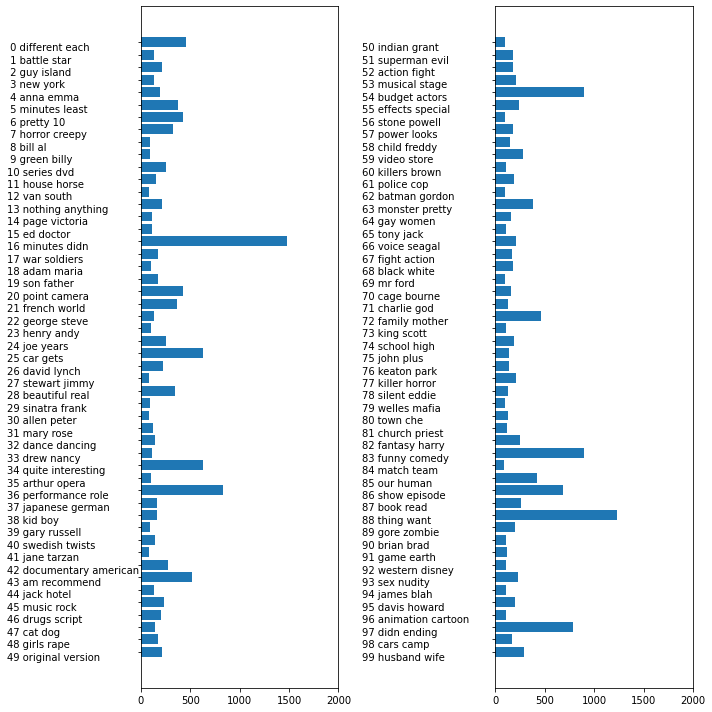

In [72]:
# 토픽을 조사하는 방법_2 : 각 토픽의 가중치가 얼마인지 모든 리뷰에 걸쳐 document_topics 값을 합함
# LDA로 학습한 토픽 가중치
fig, ax = plt.subplots(1, 2, figsize = (10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
              for i, words in enumerate(feature_names[sorting[:, :2]])]
# 열이 두 개인 막대 그래프
for col in [0, 1]:
  start = col * 50
  end = (col + 1) * 50
  ax[col].barh(np.arange(50), np.sum(document_topics100, axis = 0)[start:end])
  ax[col].set_yticks(np.arange(50))
  ax[col].set_yticklabels(topic_names[start:end], ha = "left", va = "top")
  ax[col].invert_yaxis()
  ax[col].set_xlim(0, 2000)
  yax = ax[col].get_yaxis()
  yax.set_tick_params(pad = 130)
plt.tight_layout()
plt.show()

**토픽 모델에 대한 요약**

- 레이블이 없거나, 레이블이 있더라도 큰 규모의 텍스트 말뭉치를 해석하는 데 좋은 방법임

- LDA는 확률적 알고리즘이므로 random_state 매개변수를 바꾸면 결과가 달라짐

- 토픽을 구별하는데 도움이 되지만 비지도 학습이므로 결론을 보수적으로 평가해야함(직접 보고 검증하는 것이 좋음)

- LDA.transform 메서드는 특성의 수를 줄일 수 있으므로 토픽이 지도 학습을 위한 압축된 표현으로 사용될 수 있음(훈련 샘플이 적을 때 유용)

## 7.10 요약과 정리

- 텍스트 데이터를 처리하는 방법 : **BOW 표현**(텍스트 분류 작업)

- 데이터의 표현이 자연어 처리의 핵심이고 추출된 토큰과 n - 그램을 분석하면 모델링 과정에서 필요한 통찰을 얻을 수 있음

- 텍스트 처리 애플리케이션에서는 지도 학습이나 비지도 학습 작업을 위해 모델을 자체적으로 분석해 의미를 찾을 수 있는 경우가 많음